In [1]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2
import matplotlib.pyplot as plt


In [2]:
baseball =pd.read_csv('baseball.csv')

In [3]:
# View summary statistics of the numeric columns
baseball.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [4]:
baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [5]:
baseball.tail()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


In [6]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [7]:
baseball.shape

(1232, 15)

### Dataset was checked for missing data

In [8]:
baseball.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Team  League   Year     RS     RA      W    OBP    SLG     BA  \
0     False   False  False  False  False  False  False  False  False   
1     False   False  False  False  False  False  False  False  False   
2     False   False  False  False  False  False  False  False  False   
3     False   False  False  False  False  False  False  False  False   
4     False   False  False  False  False  False  False  False  False   
...     ...     ...    ...    ...    ...    ...    ...    ...    ...   
1227  False   False  False  False  False  False  False  False  False   
1228  False   False  False  False  False  False  False  False  False   
1229  False   False  False  False  False  False  False  False  False   
1230  False   False  False  False  False  False  False  False  False   
1231  False   False  False  False  False  False  False  False  False   

      Playoffs  RankSeason  RankPlayoffs      G   OOBP   OSLG  
0        

In [9]:
baseball_num=baseball.select_dtypes(include='number').columns

In [10]:
baseball_num

Index(['Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs', 'RankSeason',
       'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')

### Missing data was filled by imputeed using the mean of each column

In [11]:
baseball[baseball_num]=baseball[baseball_num].fillna(baseball[baseball_num].mean())

In [12]:
baseball

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,3.122951,2.717213,162,0.317000,0.415000
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.000000,5.000000,162,0.306000,0.378000
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.000000,4.000000,162,0.315000,0.403000
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,3.122951,2.717213,162,0.331000,0.428000
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,3.122951,2.717213,162,0.335000,0.424000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,3.122951,2.717213,161,0.332264,0.419743
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,3.122951,2.717213,161,0.332264,0.419743
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.000000,2.000000,165,0.332264,0.419743
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,3.122951,2.717213,163,0.332264,0.419743


In [13]:
baseball.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,0.772345,0.486610,0.624365,0.008924,0.015466
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,3.122951,2.717213,162.000000,0.332264,0.419743
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.122951,2.717213,162.000000,0.332264,0.419743
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,3.122951,2.717213,162.000000,0.332264,0.419743
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


## Data Vizualiztion

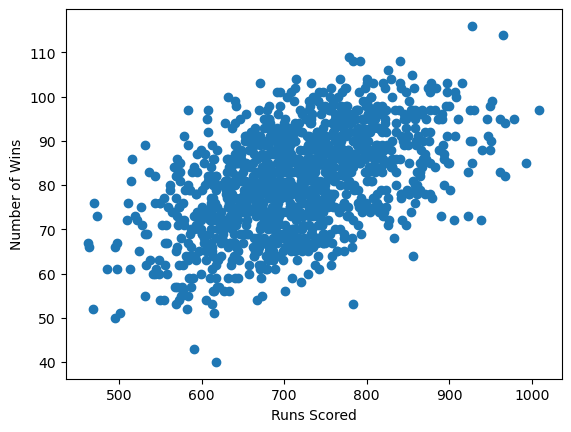

In [14]:
# Plot number of wins vs. number of runs scored
plt.scatter(baseball["RS"], baseball["W"])
plt.xlabel("Runs Scored")
plt.ylabel("Number of Wins")
plt.show()

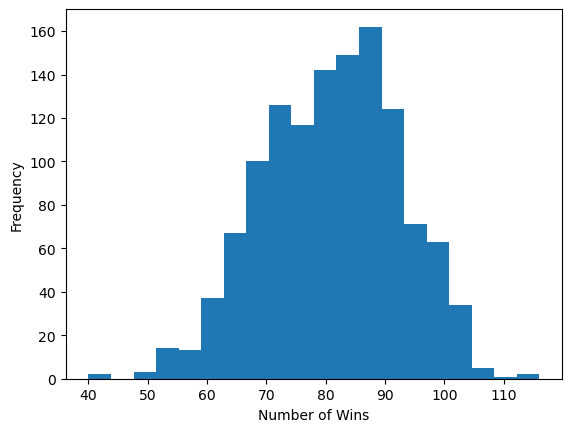

In [15]:
# Plot histogram of number of wins
plt.hist(baseball["W"], bins=20)
plt.xlabel("Number of Wins")
plt.ylabel("Frequency")
plt.show()

corr_matrix=baseball.corr()
corr_matrix

In [16]:
# Create a new column for decade
baseball["Decade"] = (baseball["Year"] // 10) * 10

In [17]:
# Create a contingency table of number of wins by decade
wins_by_decade = pd.crosstab(baseball["Decade"], baseball["W"])
wins_by_decade

W,40,43,50,51,52,53,54,55,56,57,...,101,102,103,104,105,106,108,109,114,116
Decade,,,,,,,,,,,,,,,,,,,,,
1960,1,0,1,1,2,1,0,0,1,1,...,1,2,2,1,0,0,0,1,0,0
1970,0,0,0,0,0,1,2,1,2,2,...,4,5,0,0,0,0,2,0,0,0
1980,0,0,0,0,0,0,2,0,0,1,...,1,0,1,2,0,0,1,0,0,0
1990,0,0,0,0,0,1,1,0,0,1,...,1,1,3,1,0,1,0,0,1,0
2000,0,1,0,1,0,0,0,2,2,0,...,4,1,3,0,1,0,0,0,0,1
2010,0,0,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0




## Chi-Square Goodness-of-Fit test on baseball datset

### Null hypothsis(H0):There is no significant difference in the number of wins by decade.
### Alternative hypothesis(Ha):There is a significant difference in the number of wins by decade.

In [18]:
# Calculate expected values
expected_wins = wins_by_decade.sum().sum() / wins_by_decade.size
expected_values = pd.DataFrame(expected_wins, index=wins_by_decade.index, columns=wins_by_decade.columns)

In [19]:
# Perform Chi-Square Goodness-of-Fit test
from scipy.stats import chisquare
chi2, p_value = chisquare(f_obs=wins_by_decade, f_exp=expected_values, axis=None)
print("Chi-Square test statistic:", chi2)
print("p-value:", p_value)

Chi-Square test statistic: 1198.6136363636363
p-value: 2.5278818013120268e-86


In [20]:
if p_value < 0.05:
    print('Reject the null hypothesis: There is no significant difference in the number of wins by decade.')
else:
    print('Fail to reject the null hypothesis: There is a significant difference in the number of wins by decade.')


Reject the null hypothesis: There is no significant difference in the number of wins by decade.


## Anova Two Way Test on crop datset

### Null hypothesis for fertilizer: The mean yield is the same for all levels of fertilizer.
### Alternative hypothesis for fertilizer: The mean yield is different for at least one level of fertilizer.
### Null hypothesis for density: The mean yield is the same for all levels of density.
### Alternative hypothesis for density: The mean yield is different for at least one level of density.
### Null hypothesis for interaction: The effect of fertilizer on yield is the same for all levels of density, and the effect of density on yield is the same for all levels of fertilizer.
### Alternative hypothesis for interaction: The effect of fertilizer on yield is different for at least one level of density, or the effect of density on yield is different for at least one level of fertilizer.

In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
crop=pd.read_csv('crop_data.csv')

In [41]:
crop

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486
...,...,...,...,...
91,2,4,3,177.405292
92,1,1,3,178.141644
93,2,2,3,177.710613
94,1,3,3,177.687264


In [42]:
crop.describe()

,density,block,fertilizer,yield
count,96.000000,96.000000,96.000000,96.000000
mean,1.500000,2.500000,2.000000,177.015476
std,0.502625,1.123903,0.820783,0.664548
min,1.000000,1.000000,1.000000,175.360840
25%,1.000000,1.750000,1.000000,176.468696
50%,1.500000,2.500000,2.000000,177.058105
75%,2.000000,3.250000,3.000000,177.398571
max,2.000000,4.000000,3.000000,179.060899


In [50]:
# Convert variables to factors
crop["density"] = crop["density"].astype("category")
crop["fertilizer"] = crop["fertilizer"].astype("category")
crop["block"] = crop["block"].astype("category")

In [46]:
crop = crop.rename(columns={"yield": "yieeld"})


In [48]:
# Fit the two-way ANOVA model
model = ols('yieeld ~ C(density) + C(fertilizer) + C(density):C(fertilizer)', data=crop).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [49]:
# Print the ANOVA table
print(anova_table)
# Extract the F-statistic and p-value for each effect
f_density, p_density = anova_table.loc['C(density)', ['F', 'PR(>F)']]
f_fertilizer, p_fertilizer = anova_table.loc['C(fertilizer)', ['F', 'PR(>F)']]
f_interaction, p_interaction = anova_table.loc['C(density):C(fertilizer)', ['F', 'PR(>F)']]

# Print the F-statistics and p-values for each effect
print(f"Density: F = {f_density}, p = {p_density}")
print(f"Fertilizer: F = {f_fertilizer}, p = {p_fertilizer}")
print(f"Interaction: F = {f_interaction}, p = {p_interaction}")

                             sum_sq    df          F    PR(>F)
C(density)                 5.121681   1.0  15.194517  0.000186
C(fertilizer)              6.068047   2.0   9.001052  0.000273
C(density):C(fertilizer)   0.427818   2.0   0.634605  0.532500
Residual                  30.336687  90.0        NaN       NaN
Density: F = 15.194517373649843, p = 0.00018640752419453409
Fertilizer: F = 9.001052173413827, p = 0.0002731889552673193
Interaction: F = 0.6346052902456933, p = 0.532500091383282


In [58]:

# Define the significance level
alpha = 0.05

# Test the interaction effect
if p_interaction < alpha:
    print("Reject the null hypothesis that the effect of fertilizer on yield is the same for all levels of density, and the effect of density on yield is the same for all levels of fertilizer.")
else:
    print("Fail to reject the null hypothesis that the effect of fertilizer on yield is the same for all levels of density, and the effect of density on yield is the same for all levels of fertilizer.")
# Test the effect of gas type
if p_density < alpha:
    print("Reject the null hypothesis that the mean yield is the same for all levels of density.")
else:
    print("Fail to reject the null hypothesis that the mean yield is the same for all levels of density.")

# Test the effect of drive type
if p_fertilizer < alpha:
    print("Reject the null hypothesis that the mean yield is the same for all levels of fertilizer.")
else:
    print("Fail to reject the null hypothesis that the mean yield is the same for all levels of fertilizer.")

Fail to reject the null hypothesis that the effect of fertilizer on yield is the same for all levels of density, and the effect of density on yield is the same for all levels of fertilizer.
Reject the null hypothesis that the mean yield is the same for all levels of density.
Reject the null hypothesis that the mean yield is the same for all levels of fertilizer.
